In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
df=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2019_data\HCHO\April_HCHO.csv",index_col=0)
df

,78.036735138125,78.102088894375,78.16744265062499,78.232796406875,78.29815016312502,78.363503919375,78.428857675625,78.494211431875,78.559565188125,78.624918944375,78.69027270062499,78.755626456875,78.82098021312501,78.886333969375,78.951687725625,79.017041481875
17.885359,0.000226,0.000275,0.000214,0.000248,0.000221,0.000215,0.000250,0.000230,0.000268,0.000243,0.000216,0.000215,0.000248,0.000229,0.000208,0.000184
17.853064,0.000207,0.000213,0.000226,0.000222,0.000245,0.000246,0.000251,0.000242,0.000264,0.000209,0.000255,0.000227,0.000229,0.000217,0.000204,0.000167
17.820768,0.000199,0.000230,0.000218,0.000257,0.000217,0.000269,0.000261,0.000237,0.000264,0.000250,0.000275,0.000233,0.000238,0.000225,0.000234,0.000192
17.788473,0.000202,0.000223,0.000237,0.000287,0.000211,0.000232,0.000268,0.000234,0.000245,0.000261,0.000269,0.000245,0.000220,0.000199,0.000268,0.000242
17.756178,0.000194,0.000187,0.000235,0.000275,0.000228,0.000228,0.000265,0.000274,0.000254,0.000261,0.000259,0.000263,0.000237,0.000196,0.000258,0.000220
17.723882,0.000191,0.000196,0.000257,0.000245,0.000255,0.000278,0.000258,0.000292,0.000290,0.000253,0.000246,0.000253,0.000254,0.000228,0.000194,0.000249
17.691587,0.000237,0.000208,0.000288,0.000191,0.000220,0.000270,0.000297,0.000246,0.000244,0.000260,0.000243,0.000235,0.000229,0.000231,0.000202,0.000258
17.659291,0.000251,0.000281,0.000236,0.000206,0.000207,0.000257,0.000260,0.000258,0.000258,0.000267,0.000240,0.000240,0.000207,0.000227,0.000226,0.000224
17.626996,0.000238,0.000240,0.000207,0.000207,0.000218,0.000275,0.000235,0.000238,0.000264,0.000274,0.000263,0.000240,0.000234,0.000208,0.000234,0.000243
17.594700,0.000234,0.000225,0.000236,0.000207,0.000256,0.000285,0.000269,0.000213,0.000266,0.000276,0.000253,0.000242,0.000215,0.000232,0.000239,0.000206


In [15]:
pollutant_values = {
    'HCHO': [],
    'O3': [],
    'NO2': [],
    'CO': [],
    'nlst_scaled': []
}

pols = ['HCHO', 'O3', 'NO2', 'CO', 'nlst_scaled']
for i in range(2018, 2024):
    for pol in pols:
        dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\{pol}"
        filenames = os.listdir(dir_path)

        month_mapping = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
        }

        # Sort the filenames based on the month extracted from the filename
        sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
        for filename in sorted_filenames:
            filepath = os.path.join(dir_path, filename)
            df = pd.read_csv(filepath, index_col=0)
            val = df.stack().mean()
            
            # Append the value to the appropriate list based on the pollutant type
            pollutant_values[pol].append(val)

# Now you have the values stored in the corresponding lists
HCHO_vals = pollutant_values['HCHO'][5:]
CO_vals = pollutant_values['CO'][5:]
O3_vals = pollutant_values['O3'][5:]
NO2_vals = pollutant_values['NO2'][5:]
nlst_vals=pollutant_values['nlst_scaled'][5:]
print(HCHO_vals)
print(CO_vals)
print(O3_vals)
print(NO2_vals)
print(nlst_vals)

from scipy.stats import spearmanr
print(spearmanr(HCHO_vals,NO2_vals))

[0.0001768417324607161, 0.00011024235172951097, 0.00010865418875782736, 0.00015123186559923225, 0.00017772473012574874, 0.0001817269018070979, 0.00016646894378022446, 0.0001607292740724119, 0.00018247016511542083, 0.00020374267211683498, 0.0002268968247638242, 0.0002533743764312127, 0.00018132233793337964, 0.00013347345778428008, 0.00012484053204385312, 0.0001244847562114751, 0.00014110792771281742, 0.00015843869561341667, 0.0001419060914106758, 0.00015303237902718488, 0.00016724116777969708, 0.00019649433359816541, 0.00021187171748043542, 0.0002442210952418529, 0.00015632201266266768, 0.0001250055061271952, 0.0001044369221339711, 0.00013432944059934044, 0.0001640017711451458, 0.00016743540202995076, 0.0001644892920011858, 0.00016276414676208168, 0.00019050540226994275, 0.00022308052008757813, 0.0002250645848713329, 0.00021202380633738208, 0.00014893196379636535, 0.0001367496118049456, 0.0001257978358125546, 0.00012556625566347997, 0.00016012060415651874, 0.00015887058438764258, 0.0001

In [3]:
start_date = '2018-06-01'
end_date = '2023-12-31'

# Generate a list of months over the 5-year period
months = pd.date_range(start=start_date, end=end_date, freq='MS').strftime("%y-%m").tolist()

print(months)

['18-06', '18-07', '18-08', '18-09', '18-10', '18-11', '18-12', '19-01', '19-02', '19-03', '19-04', '19-05', '19-06', '19-07', '19-08', '19-09', '19-10', '19-11', '19-12', '20-01', '20-02', '20-03', '20-04', '20-05', '20-06', '20-07', '20-08', '20-09', '20-10', '20-11', '20-12', '21-01', '21-02', '21-03', '21-04', '21-05', '21-06', '21-07', '21-08', '21-09', '21-10', '21-11', '21-12', '22-01', '22-02', '22-03', '22-04', '22-05', '22-06', '22-07', '22-08', '22-09', '22-10', '22-11', '22-12', '23-01', '23-02', '23-03', '23-04', '23-05', '23-06', '23-07', '23-08', '23-09', '23-10', '23-11', '23-12']


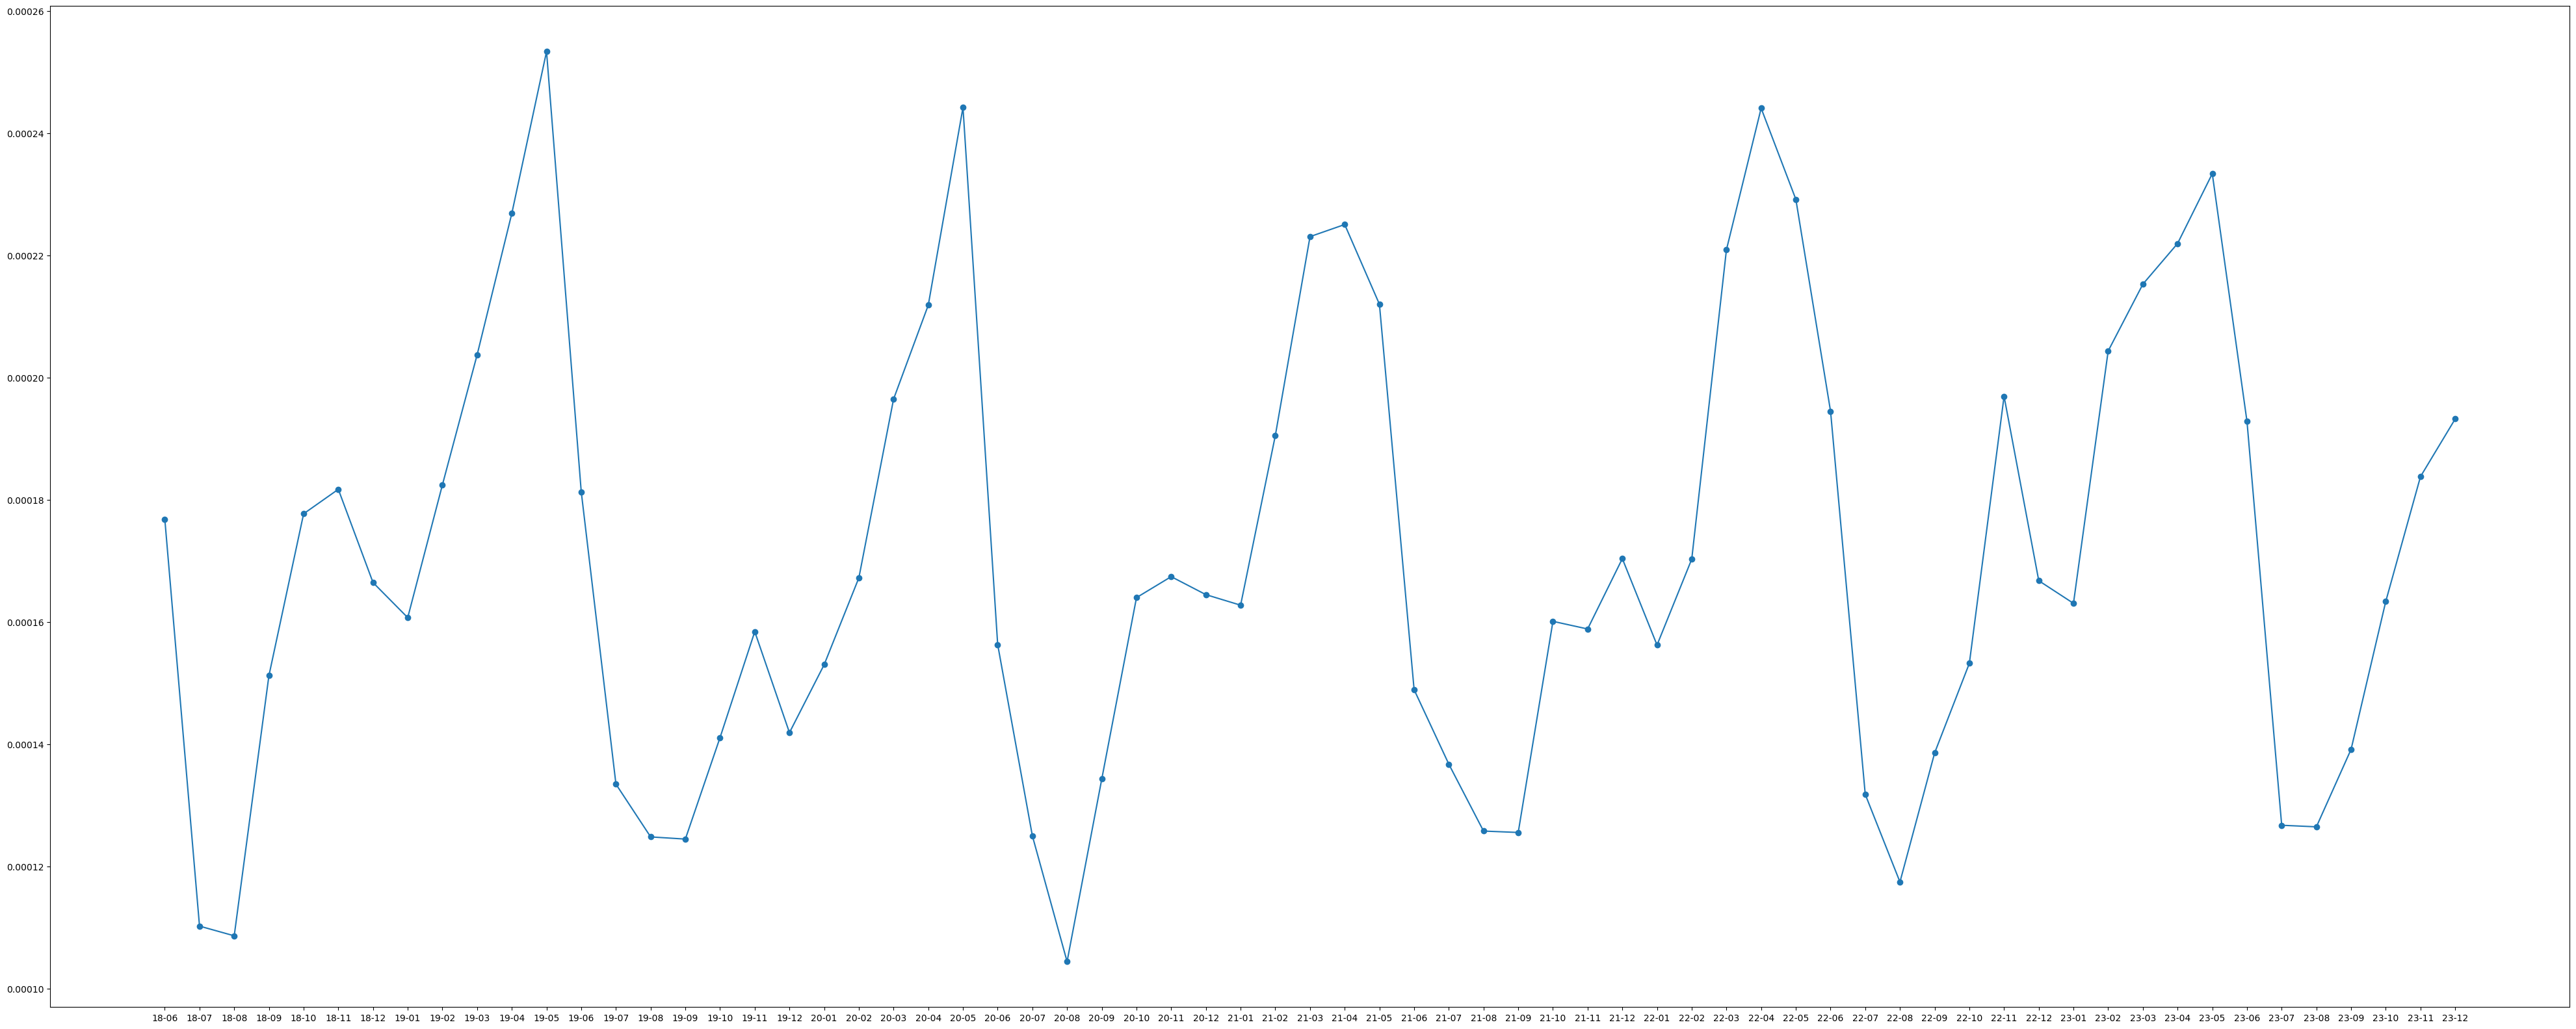

In [4]:
plt.figure(figsize=(50,20))

# Plotting HCHO values over months
plt.plot(months, HCHO_vals, marker='o')

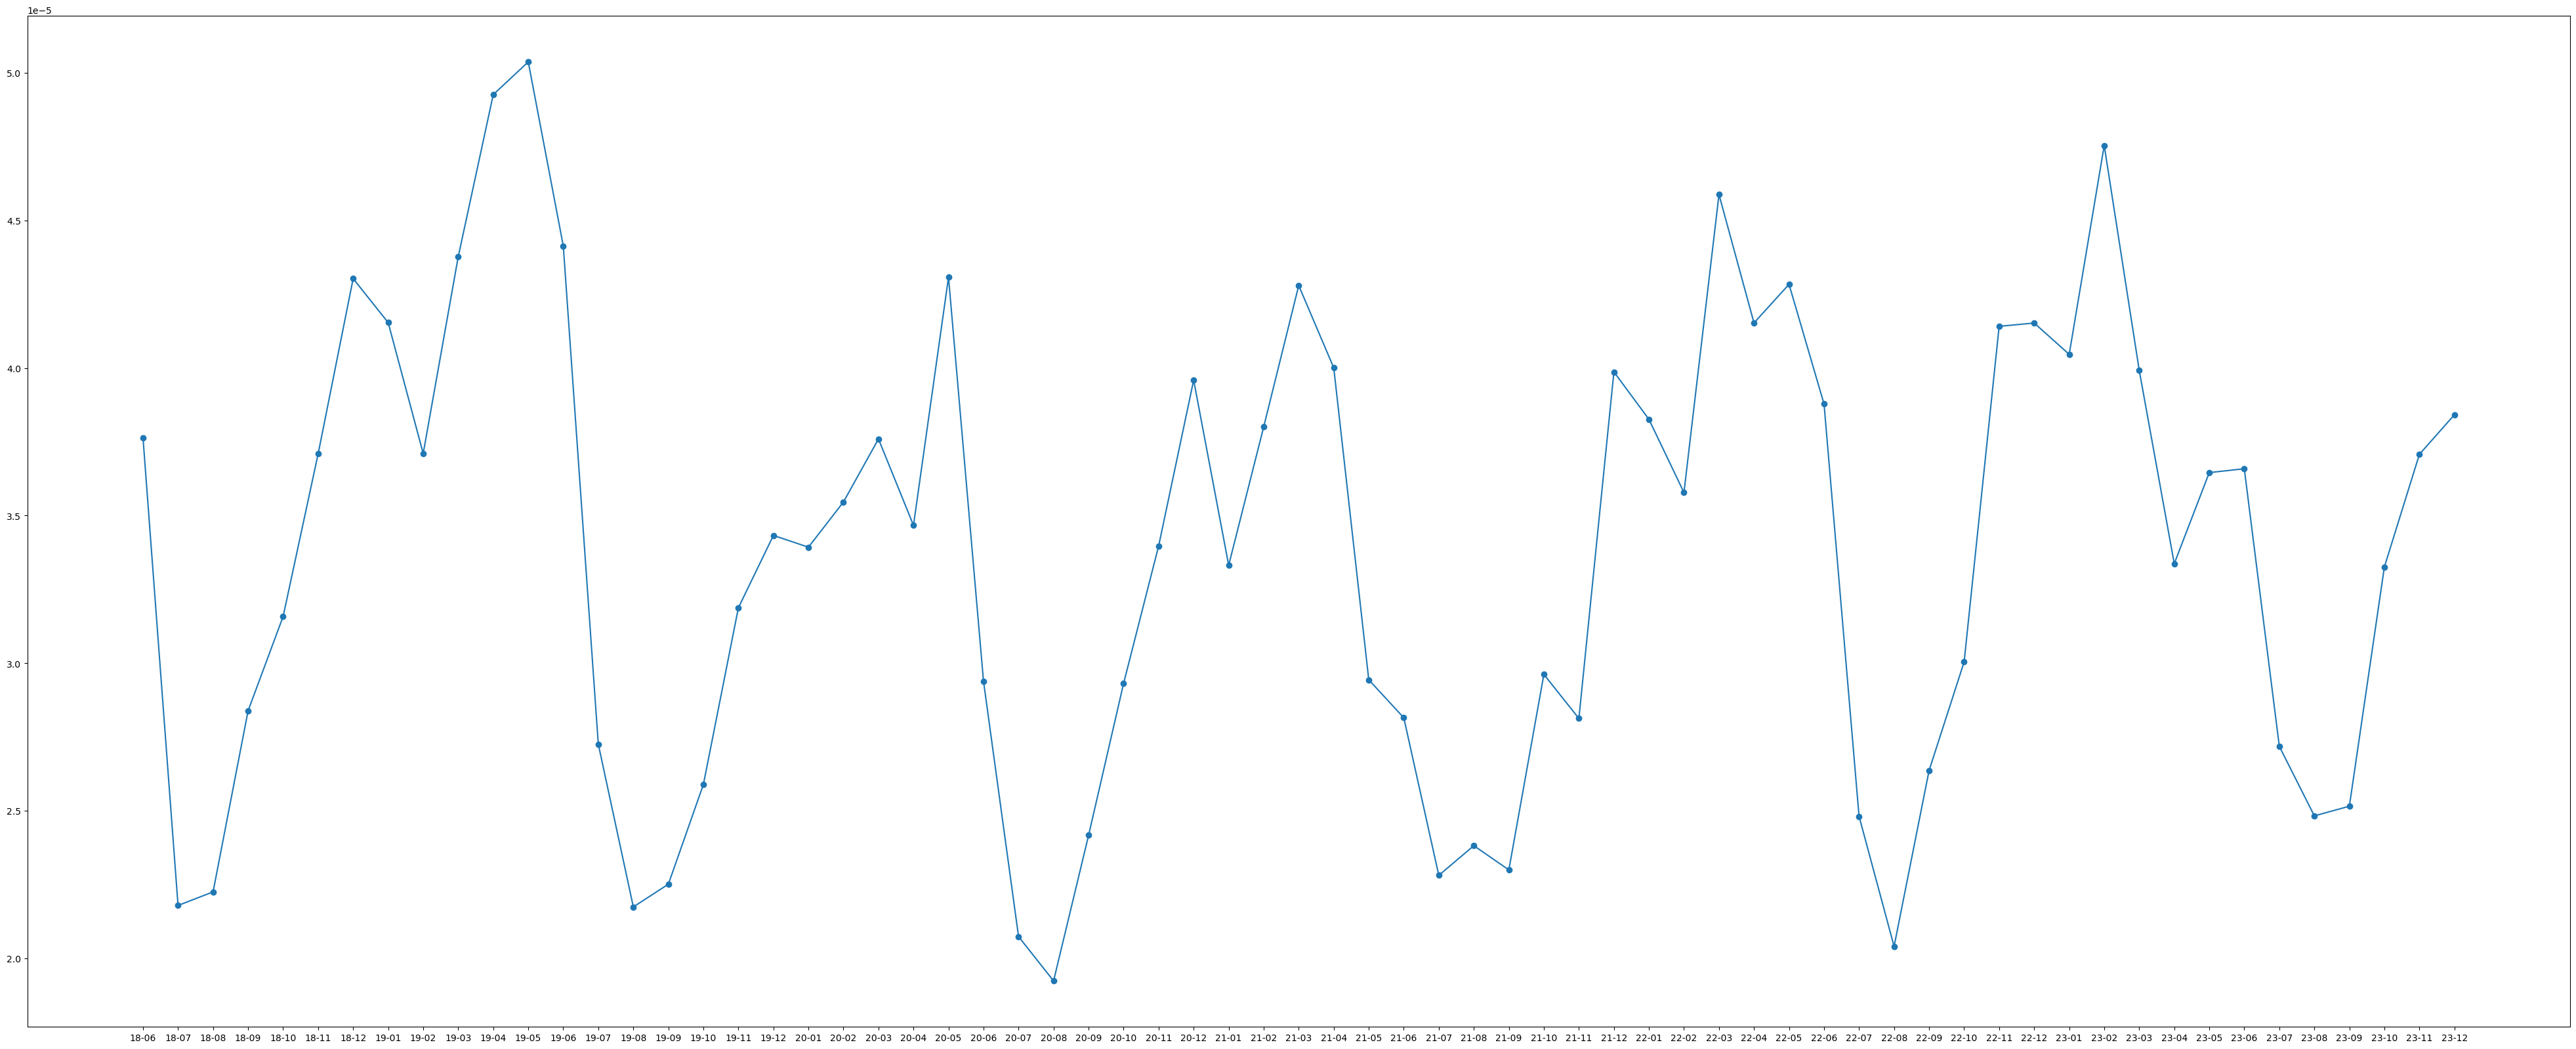

In [5]:
plt.figure(figsize=(50,20))
plt.plot(months,NO2_vals,marker='o')

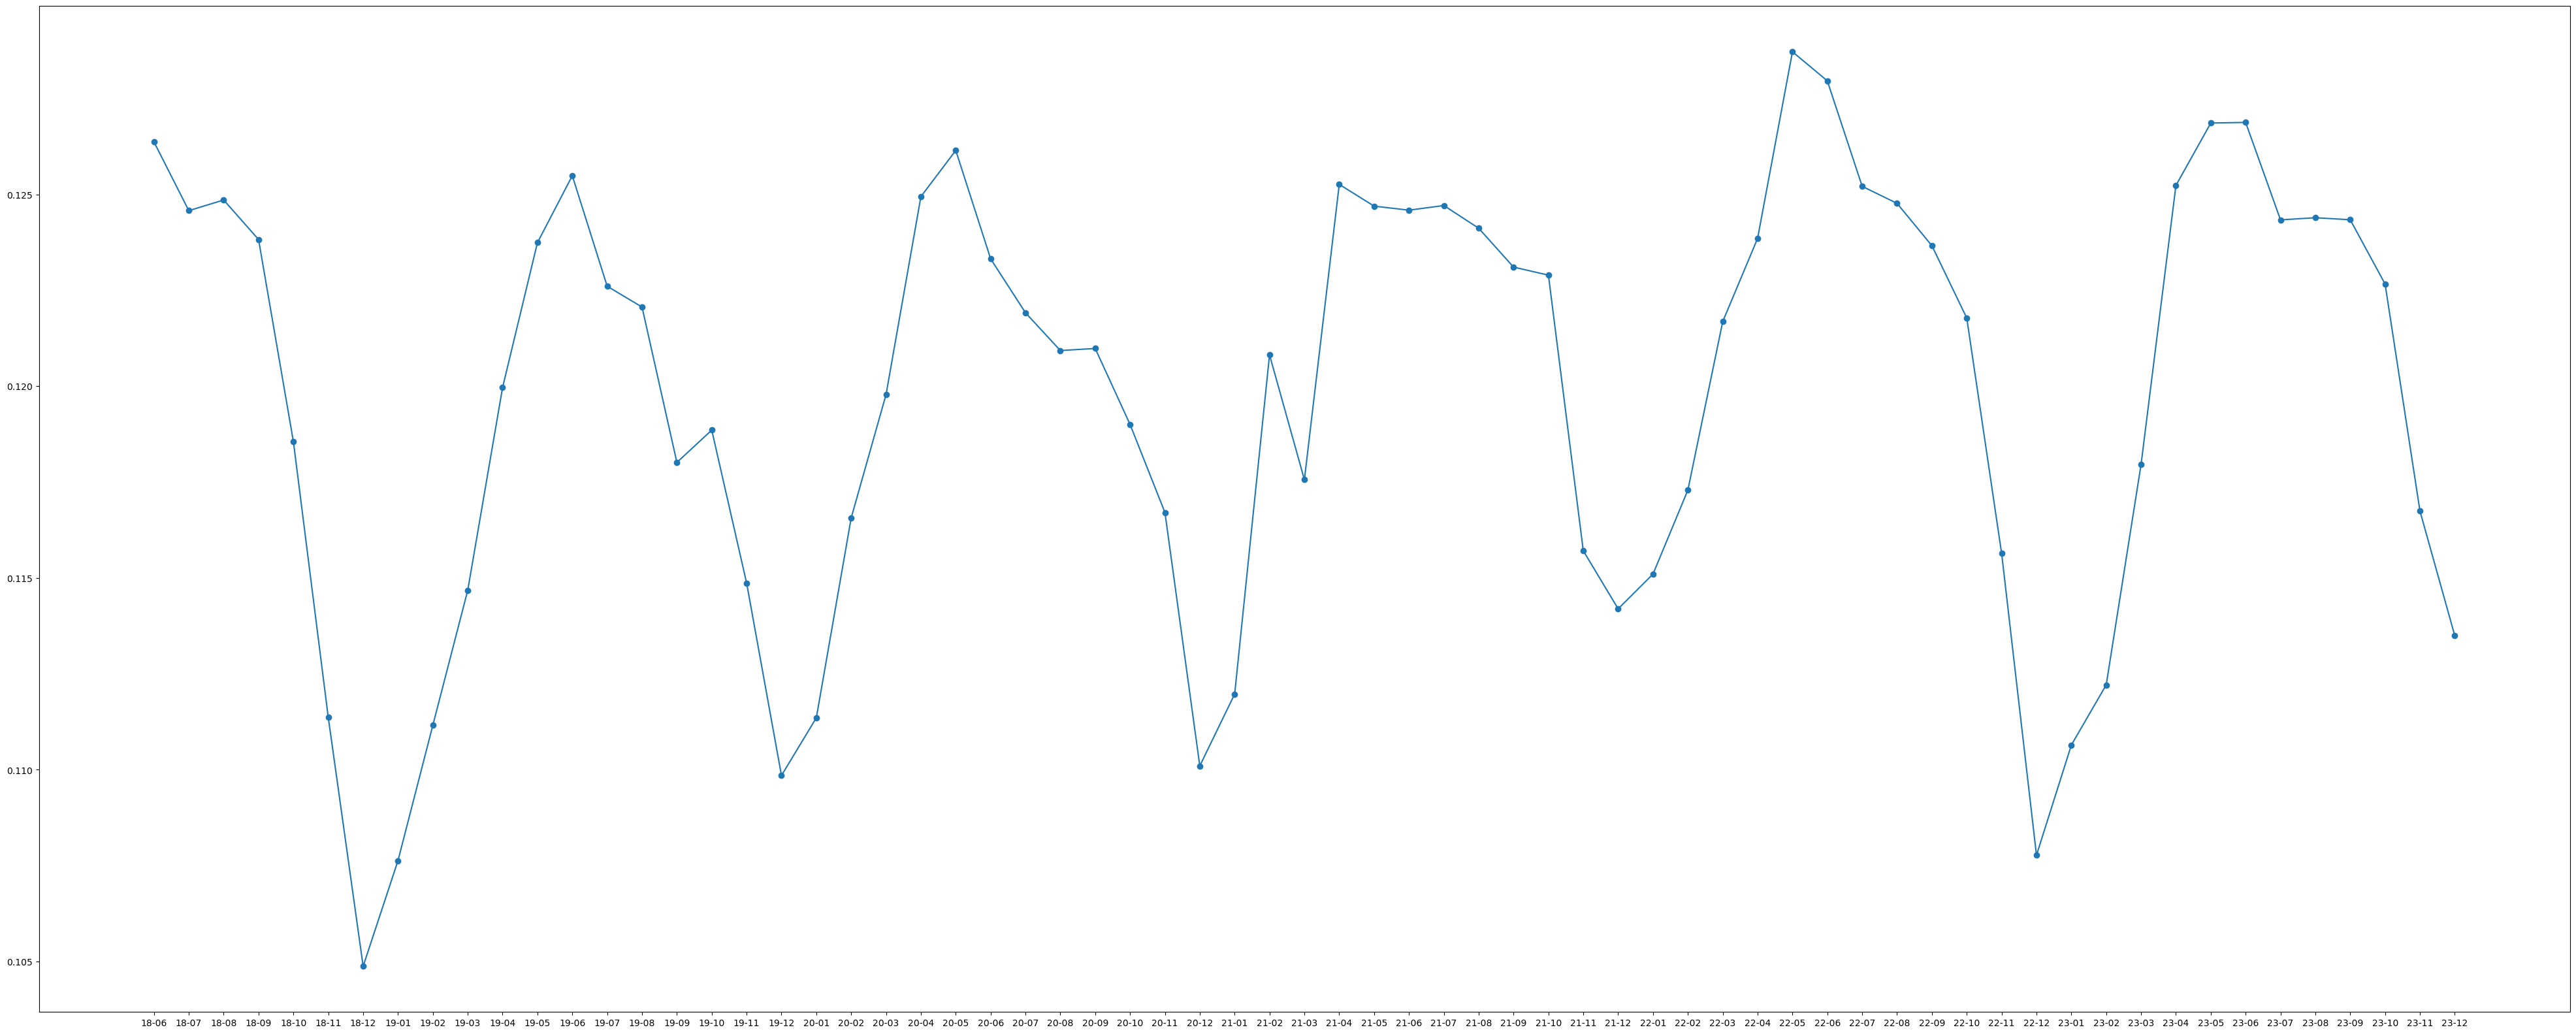

In [6]:
plt.figure(figsize=(50,20))
plt.plot(months,O3_vals,marker='o')

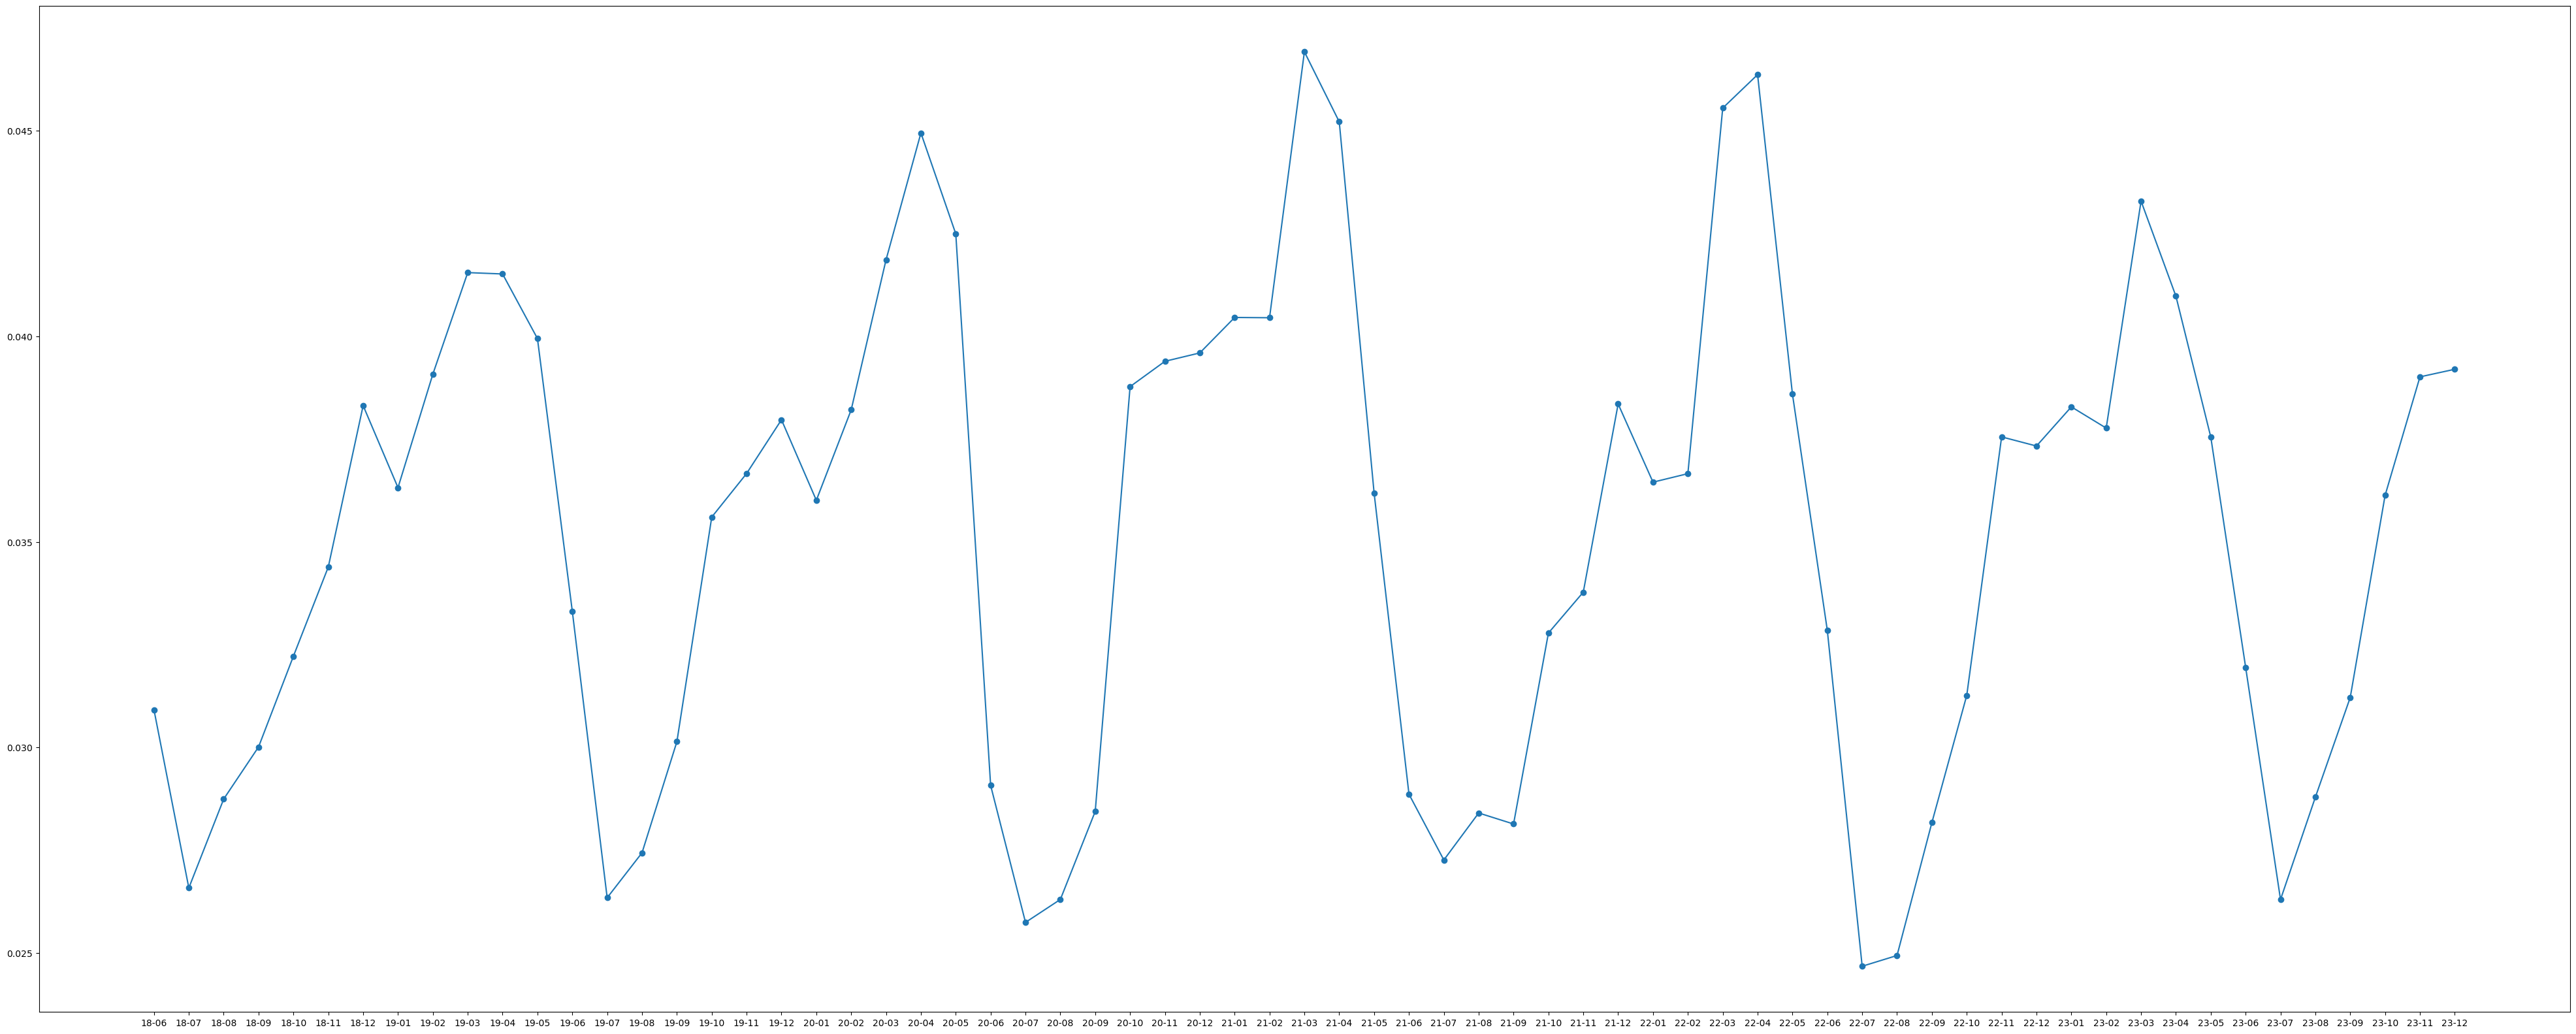

In [7]:
plt.figure(figsize=(50,20))
plt.plot(months,CO_vals,marker='o')